# P-ai Workshop: Session 2

Hello!
This is the notebook for the second session of the Fall 2019 [P-ai](http://www.p-ai.org) workshops.
It covers data processing with pandas.

This is adapted from [Aashita Kesharwani's workshop series at Harvey Mudd.](http://www.aashitak.com/ML-Workshops/)

# Part 1: What even is machine learning?
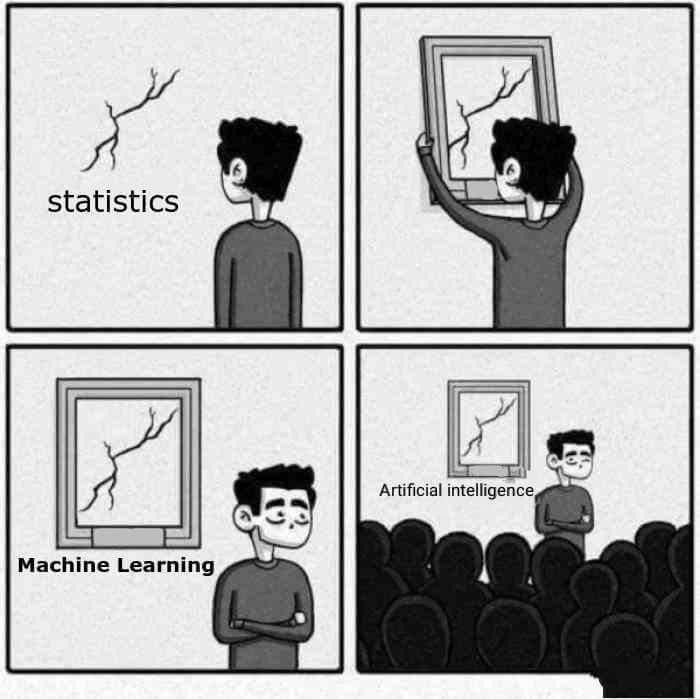

### **What is learning?**

According to one definition, 
```
"Machine learning is the study of computer algorithms that improve automatically through experience." 
```
As a first overview, the process of machine learning looks like this:

```
0: Have a problem
1: Get data (usually)
2: Pick a machine learning model
3: Train model
4: Test model
5: Refine process + make adjustments
```

*What does it mean to learn?*

When training, machine learning is almost always an **optimization** task- there is some metric that the algorithm is trying to maximize / minimize.

**EX:** Consider training a machine learning model to...

(a) Predict whether a person survived the Titanic based on personal data like age, ticket class, etc.

(b) Identify which handwritten digit (0-9) is shown in a picture

(c) Play Tetris

In each of these cases, we can think of some metric that the model should learn to optimize!

### **What kinds of problems can we have?**

Generally, we're interested in three types of machine learning tasks:

```
1. Classification
2. Regression
3. Reinforcement learning (RL)
```

**Classification:** Given a data point, assign it a class. *Ex: predict whether a person survived the Titanic (classes are 'Survived' and 'Died')*

**Regression:** Given a data point, assign it some continuous value. *Ex: given a picture of a house, predict its price in dollars*

*(Important note: for classification and regression, each data point has **features** – think age for the Titanic example or individual pixels in the price guesser example – that the model uses to make its predictions)*

**Reinforcement learning:** Learn how to interact with an environment to maximize some reward *Ex: learn to play Tetris*

### **Why is all of today about data preparation and not ML?**

Data preparation **IS** part of machine learning, and an important one too. If you don't prepare your data correctly or fail to "get to know your data", your model will either (worst case) crash and burn or (best case) not perform as well as it could.

```
"Expecting a model to perform well on poor data is like expecting to do well on an exam after not studying, 
not getting enough sleep, and taking a NyQuil as the test is being passed out."
```

So today we'll be going over how to get a feel of your data quantitatively and qualitatively, and how to perform **feature engineering** so our data is ready for training! Next week we'll use the data we preprocessed to make some predictions with a ML model ＼(^-^)／

Process overview for classification and regression tasks:
```
0: Have a problem
1: Get data
2: Spend quality time with data, looking for patterns, etc. (R&D)
3: Perform feature engineering to prepare for training
2: Pick a machine learning model
3: Train model
4: Test model
5: Refine process + make adjustments
```

# Part 2: Data preprocessing with pandas

In this workshop, we will be focusing on the two supervised learning tasks: 
- Classification 
- Regression

### Overview
Topics to be covered today:  
- Slicing dataframes with conditionals, iloc, loc
- Concatentating and merging dataframes
- Detecting and filling missing values in the dataframes 
- Regular expressions for data extraction

- Feature engineering
- Finding correlations
- Encoding categorical variables
- Basic plots
- Basic operations such as dropping rows/columns, setting index, replacing values of a column using a dictionary, etc.



#### Before we get started, dictionaries: 

We never actually went over dictionaries last time! They're pretty simple python structures.

An example of a dictionary: `myDict = {1: "hello", "may": 5, "me": "cool"}`
They're lists of key/value pairs. Calling `myDict[1]` would return `hello`. Calling `myDict["may"]` would return `5`.


#### Another note:

This is a pretty long notebook, and it also uses the name "df" for multiple dataframes. If you're running into issues, first make sure that you ran all the cells before that you needed to run. Also make sure that you're looking at the right df. 

# Groundhog Day (2a)

Let's first import the python module `pandas`.

In [2]:
import pandas as pd

Pandas uses Dataframes! 
- Evolved out of tables
- Most suitable for data manipulation tasks 
- Basically fancy lists

Pandas is built on top of numpy. The crucial difference between numpy matrices and pandas Dataframes is that the columns in a Dataframe can be of different datatypes such as numerical, categorical, textual, etc.

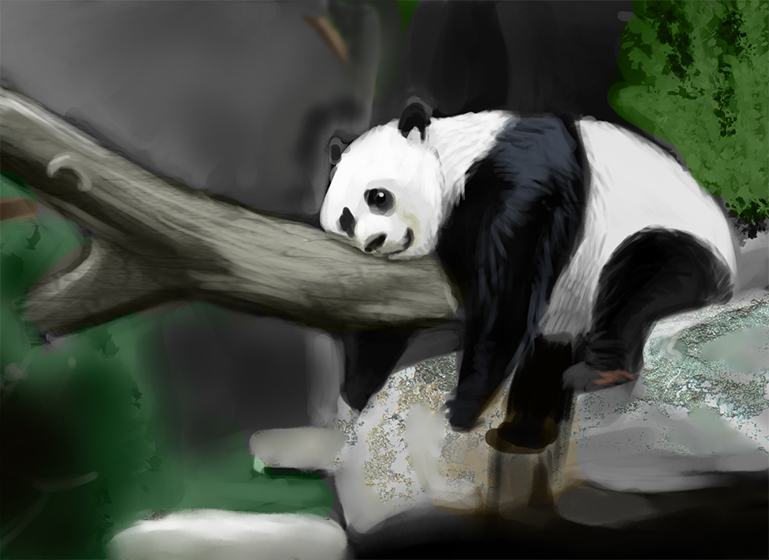

First, we load the Groundhog Day dataset [available here](https://www.kaggle.com/groundhogclub/groundhog-day/home)

In [3]:
df = pd.read_csv('archive.csv')     #this read_csv command converts a text file of comma separated values to a dataframe

The legend behind Groundhog Day tradition goes likes this:

> Thousands gather at Gobbler’s Knob in Punxsutawney, Pennsylvania, on the second day of February to await the spring forecast from a groundhog known as Punxsutawney Phil. According to legend, if Phil sees his shadow the United States is in store for six more weeks of winter weather. But, if Phil doesn’t see his shadow, the country should expect warmer temperatures and the arrival of an early spring.

[The dataset](https://www.kaggle.com/groundhogclub/groundhog-day/home) consists of the temperature records as well as the sightings of groundhog Phil.

In [ ]:
df

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
127,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
128,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
129,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6
130,2016,No Shadow,39.47,28.1,36.9,30.8,47.50,38.8,49.5,43.4


Next, let's check the numbers of rows and columns in the dataset.

In [ ]:
df.shape

(132, 10)

So, the dataset consists of 132 rows and 10 columns. 

We use `head()` function to peek into the first 5 rows (or any number of rows by using `head(n)`). 

In [4]:
df.head()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This has not been particularly useful since the records for the first few years are missing. Use a built-in function to display **the last 10 rows** from the DataFrame.

In [ ]:
df.tail(10)

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
122,2008,Full Shadow,34.70,25.4,32.1,27.7,41.86,31.6,42.0,35.6
123,2009,Full Shadow,36.77,26.2,35.9,29.6,42.87,34.1,45.7,38.2
124,2010,Full Shadow,31.80,25.9,28.2,25.8,43.57,39.6,44.6,42.0
125,2011,No Shadow,33.04,24.1,34.4,28.6,43.07,33.0,44.2,36.3
126,2012,Full Shadow,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7
127,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
128,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
129,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6
130,2016,No Shadow,39.47,28.1,36.9,30.8,47.50,38.8,49.5,43.4
131,1901-2000,NaN,33.82,22.5,32.9,26.5,41.50,32.3,42.4,35.9


Let's see the column titles in the DataFrame. 

In [ ]:
df.columns

Index(['Year', 'Punxsutawney Phil', 'February Average Temperature',
       'February Average Temperature (Northeast)',
       'February Average Temperature (Midwest)',
       'February Average Temperature (Pennsylvania)',
       'March Average Temperature', 'March Average Temperature (Northeast)',
       'March Average Temperature (Midwest)',
       'March Average Temperature (Pennsylvania)'],
      dtype='object')

### Selecting rows and columns from the dataframe

Let's say we want to see only the columns related to the groundhog Phil sighting as well as the average temperatures in February in Pennsylvania and get rid of the rest of the columns. Since we do not want all the rows in the output, we use the `head()` function at the end. This can be accomplished using double brackets:

In [ ]:
df[['Punxsutawney Phil', 'February Average Temperature (Pennsylvania)']].head(6)

# the reason we use double brackets is because 
# pandas dataframes use brackets to index, 
# but we also want the input to be multiple items, so we do this by using a python list 
# which also happens to use brackets. 

,Punxsutawney Phil,February Average Temperature (Pennsylvania)
0,No Record,NaN
1,Full Shadow,NaN
2,Full Shadow,NaN
3,No Record,NaN
4,No Shadow,NaN
5,No Record,NaN


We can also select rows based on conditions. Let's say, we want to observe only those years when there is no record for groundhog. We use `df['Punxsutawney Phil'] == "No Record"` in the conditional.

In [ ]:
df[df["Punxsutawney Phil"]=="No Record"]

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1891,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1892,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1893,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1894,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1895,No Record,26.60,15.6,21.9,17.0,39.97,27.6,40.2,31.3
10,1896,No Record,35.04,22.2,33.5,26.6,38.03,25.3,36.9,27.8
11,1897,No Record,33.39,23.6,34.7,27.9,38.79,32.0,44.0,36.9
13,1899,No Record,25.50,18.1,22.2,20.0,37.63,29.3,38.4,34.0


What's going on here? 

The conditional is returning a "series", basically a single column of a dataframe. In this case, it holds the information of which columns satisfy the conditional. When we index the df with this series, we get the desired columns. We won't get too much into these, but it's good to know they exist. 

In [ ]:
print(type(df["Punxsutawney Phil"]=="No Record")) #this shows the type that the conditional returns, a Series

(df["Punxsutawney Phil"] == "No Record")[0:10]   #this shows the first few entries of the series

<class 'pandas.core.series.Series'>


0     True
1    False
2    False
3     True
4    False
5     True
6     True
7     True
8     True
9     True
Name: Punxsutawney Phil, dtype: bool

Now, we want to restrict the above output further *to exclude the entries before the year 1895*.   
We add another conditional to the above code using `&` and make sure to wrap the two conditionals with parentheses.

Note that the year column is a string, and you should use string comparisons, which in Python work by comparing each character in order with ascii ordering. (so "92" > "46", and "string" > "bool")

In [ ]:
df[(df["Punxsutawney Phil"]=="No Record") & (df["Year"]>"1895")]

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
10,1896,No Record,35.04,22.2,33.5,26.6,38.03,25.3,36.9,27.8
11,1897,No Record,33.39,23.6,34.7,27.9,38.79,32.0,44.0,36.9
13,1899,No Record,25.50,18.1,22.2,20.0,37.63,29.3,38.4,34.0
16,1902,No Record,31.46,20.1,23.6,21.0,41.58,37.1,43.9,38.8
57,1943,No Record,36.28,23.9,35.4,27.6,38.50,30.5,38.5,34.7


We can also get the number of years with no records using the `shape` attribute which gives us both the number of columns and the number of rows. This is called with `df.shape`. This is the code to count the number of years that the groundhog saw his full shadow.

In [ ]:
df[df["Punxsutawney Phil"] == "Full Shadow"].shape[0]     #the [0] gets the length. [1] is the width

102

Here's the code to count the number of years in which the groundhog Phil saw its full shadow and the February Average Temperature in Pennsylvania was less than 26.5.

In [ ]:
df[(df["Punxsutawney Phil"]=="Full Shadow") & 
   (df["February Average Temperature (Pennsylvania)"] < 26.5)].shape[0]

45

Write the code to count the number of years in which the groundhog Phil saw its full shadow and the February Average Temperature in Pennsylvania was less than February Average Temperature in that year.

In [ ]:
df[(df["Punxsutawney Phil"]=="Full Shadow") & 
  (df["February Average Temperature (Pennsylvania)"] < df["February Average Temperature"])].shape[0]

98

Is it common for Pennsylvania to have temperatures colder than average? Write down the code for counting the years when February Average Temperature in Pennsylvania is less than February Average Temperature in general.  

In [ ]:
df[(df["February Average Temperature (Pennsylvania)"] < df["February Average Temperature"])].shape[0]

121

### The `loc` and `iloc` methods

This is how to get dataframe entries by index, rather than by conditionals.
* `.iloc[]` takes integers
* `loc[]` takes labels (for example, the string 'Punxsutawney Phil')

They generally take two parameters, the first being the row indices and the second being the column indices. If just one is provided, it'll understand that as row indices. 

In [11]:
df.loc[:5]    # like list slicing, the :5 means get the subdataframe from row 0 to 5. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
#df.iloc[:3, ['Year', 'Punxsutawney Phil']] # This will give an error
df.iloc[:3, [0, 2]]      

,Year,February Average Temperature
0,1886,NaN
1,1887,NaN
2,1888,NaN


 Just like Python lists, the indexing in pandas start from 0. To get the **11th row**, we use `df.iloc[10]` as below.

In [ ]:
df.iloc[10]

Year                                                1896
Punxsutawney Phil                              No Record
February Average Temperature                       35.04
February Average Temperature (Northeast)            22.2
February Average Temperature (Midwest)              33.5
February Average Temperature (Pennsylvania)         26.6
March Average Temperature                          38.03
March Average Temperature (Northeast)               25.3
March Average Temperature (Midwest)                 36.9
March Average Temperature (Pennsylvania)            27.8
Name: 10, dtype: object

The `.iloc[]` method can slice any collection of rows, not necessarily consecutive. For example, we can slice data corresponding to every tenth year.

In [ ]:
df.iloc[0:len(df):10]     #this follows the pattern of List[a:b:c] meaning to get the sublist from a to b, skipping by c's. 

For convenience, we want to work with a subset of dataset, say the most recent 20 years of data. Complete the code below using `.iloc[]` method to give the last 20 entries of the dataset. 

In [ ]:

df.iloc[-20:]


Now, we use the `.loc[]` method to find out whether Phil cast a full shadow or not in the year 2000. We use a conditional for the row index.

In [ ]:
df.loc[df['Year']=='2000', 'Punxsutawney Phil']

114    Full Shadow
Name: Punxsutawney Phil, dtype: object

We can't use `iloc` to do the same thing, unless we already know the integer index of the year 2000.

In [ ]:
df.iloc[114, 1]

### **Part 2a key points**
In summary:
* **pandas** is a library built on numpy that is very convenient to use for tables of data and has lots of helpful built-in functions
* You can read a csv file into a DataFrame by calling `read_csv()`
* `.shape` returns a tuple indicating the dimensions of a DataFrame, and `.head()` is a helpful method for looking at the first few rows
* There are many ways to search for specific things inside a DataFrame:
  * Specific columns: `df[<list of column names>]`
  * Column criteria: `df[df[<column name>] == something]`
  * Multiple criteria: `df[(something) & (something)]`
* `iloc` is a function that *loc*ates rows and columns with *i*ntegers 
* `loc` does something similar, but accepts strings (column names, etc.)



# Titanic Data Exploration (2b)

First we import the relevant python modules:

In [5]:
import numpy as np
import pandas as pd

# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns # Comment this if seaborn is not installed (or install seaborn)
%matplotlib inline

# The module re is for regular expressions
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In this exercise session, we will explore the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic).

In [12]:
df = pd.read_csv('train.csv')  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Description for the columns](https://www.kaggle.com/c/titanic/data) is as follows.  

|Variable|	Definition|	Key|   
|:---  |:--- |:---|
|PassengerId| Passenger ID |
|Survived| 	Survival|	0 = No, 1 = Yes |
|Pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex	|Sex|	
|Age	|Age in years	|
|SibSp	|# of siblings / spouses aboard the Titanic	|
|Parch	|# of parents / children aboard the Titanic	|
|Ticket	|Ticket number	|
|Fare	|Passenger fare	|
|Cabin	|Cabin number	|
|Embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

### 1. Exploring the dataset

Use [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function for numerical features (columns) to get a brief overview of the statistics of the data.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Do the same as above for qualitative (non-numerical) features. Use `include='O'` as a parameter in the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function.

In [ ]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",male,347082,G6,S
freq,1,577,7,4,644


We can use the functions [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) on the dataframe to find out the number of missing values in each column.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Some questions to consider:
1. Suppose the final goal is to design a model to predict whether a passenger survives or not, which of these **features** seem like important predictors? How can you analyse the data in view of this objective?
2. What are the possible ways to understand the correlation of features with survival? Does correlation always implies causation? 
3. Which values might we want to drop? Which might we want to fill?
3. If you consider filling the missing values, what are the possible options? Can you make use of other values in that column to fill the missing values? Can you make use of other values in that row as well as values in that column to fill the missing values?
4. Can the title in the name column be used for guessing a passengers' age based on the age values of other passengers with the same title?

We make the `PassengerId` column the index of the dataframe by using [`set_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html). The `inplace=True` is necessary because the default set_index creates a new df with the set index. Setting inplace to true modifies the existing dataframe. 

In [ ]:
df.set_index('PassengerId', inplace=True)

Check again whether the index has been changed in the original dataframe. 

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Use the built-in pandas function to count the number of surviving and non-surviving passengers. Use [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) on the column `df['Survived']`.

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Below is a pie chart of the same using `matplotlib`:

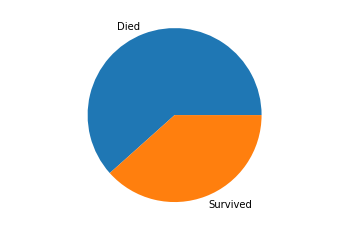

In [ ]:
plt.axis('equal')
plt.pie(df['Survived'].value_counts(), labels=('Died', "Survived"));

Below is a bar chart for the survival rate among male and female passengers using `seaborn`. Here is [Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf).

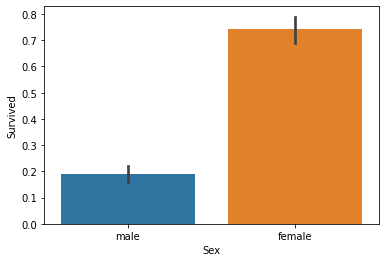

In [ ]:
sns.barplot(x = 'Sex', y = 'Survived', data = df);

Plot the survival rate among passengers in each ticket class.

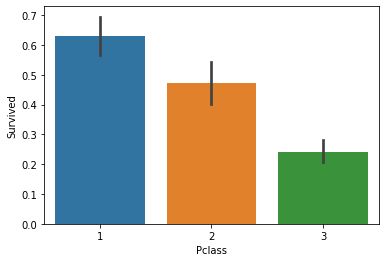

In [ ]:
sns.barplot(x = 'Pclass', y='Survived', data = df)

We can also check the survival rate among both genders within the three ticket classes as follows.

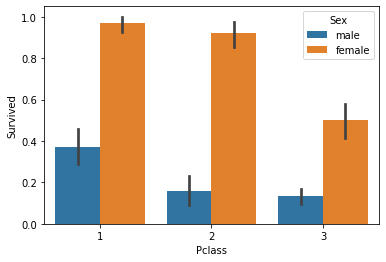

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df);

From the above chart, do you think that the gender affect the chance of survival for all the three ticket classes equally? Or does it seem like gender's effect is more pronounced for a certain ticket class passengers than others? We plot the  point estimates and confidence intervals for each sub-category to see it more clearly.

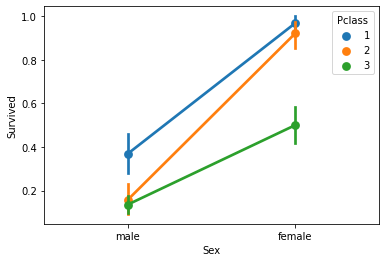

In [ ]:
sns.pointplot(x='Sex', y='Survived', hue='Pclass', data=df);

Notice the steeper slope for the second class.

It seems that gender and ticket class put together give more information about the survival chance than both of them separately. Please feel free to later explore other variables and combination of variables in depth in your own time.

This is how many children were on board.

In [ ]:
df[df['Age']<18].shape[0]

113

How many of the children on board survived?

In [ ]:
df[(df['Age']<18) & df['Survived']].shape[0]

61

What is the most common port of embarkment? Hint: Check the frequency (counts) of each value in the Embarked column using an built-in function. 

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As we saw earlier, there are missing values in the column for Embarked (**Note:** this is not good data science, this is just for practice). Fill them with the most commonly occuring value. Hint: Use [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). You can use `inPlace` here too.

In [ ]:
df['Embarked'].fillna('S', inplace=True)
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

We should remove the *Cabin* column from the DataFrame-- too many values are missing. Hint: Use [`drop()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) with appropriate value for the `axis` keyword, and appropriate values for the `label` keyword.

In [ ]:
df.drop(labels='Cabin', axis=1, inplace=True)

Let us check whether the column is indeed dropped. If not, modify the code above accordingly.

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We check again to see the missing values in the DataFrame. 

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

### 2. Feature Engineering: Creating a new column for the titles of the passengers

Now, we are going to create a new feature (column) for titles of the passengers. For that, let us first take at the passengers' names. 

In [ ]:
df.loc[:20, 'Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima'], dtype=object)

We notice one of the identifying characteristics of the titles above are that they end with a period. Regular expressions are very useful in the process of data extraction and we will use them using the python module `re` to extract the titles from the *Name* column. We will use regular expressions characters to construct a pattern and then use built-in function `findall` for pattern matching.

Some useful regular expression characters:
- `\w`: pattern must contain a word character, such as letters.
- `[ ]`: pattern must contain one of the characters inside the square brackets. If there is only one character inside the square brackets, for example `[.]`, then the pattern must contain it.

Let's try this.

In [ ]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris ad. *d.')

It worked! It returned a list instead of the string, so we use indexing to get the first element of the list.

In [ ]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris')[0]

Let us try it on another name:

In [ ]:
re.findall("\w\w[.]", 'Heikkinen, Miss. Laina')[0]

So, we want a pattern that automatically detects the length of the title and returns the entire title.

For regular expressions, \+ is added to a character/pattern to denote it is present one or more times. For example, `\w+` is used to denote one or more word characters. Fill in the regular expression in the below cell that will detect a period preceeded by one or more word characters.

In [ ]:
# Fill in below:
re.findall("\w+[.]", 'Heikkinen, Miss. Laina')[0]

The output should be `'Miss.'`

Summary: For pattern matching the titles using regular expressions:
- First we make sure it contains a period by using `[.]`. 
- Secondly, the period must be preceeded by word characters (one or more), so we use `\w+[.]`.

Write a function `get_title` that takes a name, extracts the title from it and returns the title.

In [ ]:
def get_title(name):
    return re.findall("\w+[.]", name)[0]

Check that the function is working properly by running the following two cells.

In [ ]:
get_title('Futrelle, Mrs. Jacques Heath (Lily May Peel)')

'Mrs.'

The output should be `'Mrs.'`. Note: Make sure that the funtion returns a string and not a list. Please modify the above function accordingly.

In [ ]:
get_title('Simonius-Blumer, Col. Oberst Alfons')

'Col.'

The output should be `'Col.'`.

Create a new column named Title and extract titles from the Name column using the above function `get_title`. Hint: Use built-in [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function. The syntax is `df['New_column'] = df['Relevant_column'].map(function_name)`.

In [ ]:
df['Title'] = df['Name'].map(get_title)

Let us peek into the dataframe.

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


List all the unique values for the titles along with their frequency. Hint: Use an inbuilt pandas function

In [ ]:
df["Title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Sir.           1
Ms.            1
Don.           1
Mme.           1
Capt.          1
Countess.      1
Lady.          1
Jonkheer.      1
Name: Title, dtype: int64

### 3. Correlation between variables 

Pearson correlation coefficients measures the linear correlation between the variables.

$$\rho_{X,Y} = \frac{cov(X, Y)}{\sigma_X, \sigma_Y}$$
where 
- $cov(X, Y)$ is the covariance.    
- $\sigma_X, \sigma_Y$ are standard deviations of $X$ and $Y$ respectively.

The correlation between two variables ranges from -1 to 1. The closer in absolute value a correlation is to 1, the more dependent two features are each other.

Get the correlation matrix for the variables (columns) in the dataset. The function is called `corr`.

In [ ]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


* From the above matrix, note which feature has the highest correlation with the survival. 
* Do features have high correlation among themselves? 
* Note that this matrix has excluded some categorical variables like gender, port of embarkment, etc. 

The correlation matrix can also be visualized using heatmaps as shown below.

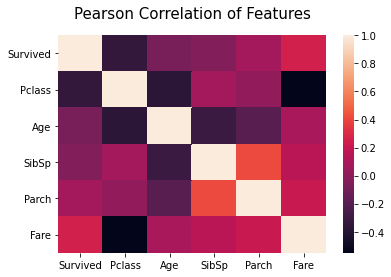

In [ ]:
correlation_matrix = df.corr();
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix);

### 4. [GroupBy object](https://pandas.pydata.org/pandas-docs/version/0.22/groupby.html)
Below is correct code to do part 2, to create a new column named *Title* that is derived from the column *Name* using regular expressions. It also compresses similar titles like "Ms." and "Miss." and together. :)

In [ ]:
df['Title'] = df['Name'].map(lambda name: re.findall("\w+[.]", name)[0])

title_dictionary = {'Ms.': 'Miss.', 'Mlle.': 'Miss.', 
              'Dr.': 'Rare', 'Mme.': 'Mr.', 
              'Major.': 'Rare', 'Lady.': 'Rare', 
              'Sir.': 'Rare', 'Col.': 'Rare', 
              'Capt.': 'Rare', 'Countess.': 'Rare', 
              'Jonkheer.': 'Rare', 'Dona.': 'Rare', 
              'Don.': 'Rare', 'Rev.': 'Rare'}

df['Title'] = df['Title'].replace(title_dictionary)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


As we saw in the last session, the *Age* column has a lot of missing values. It can be filled with the median (or mean) age of all passengers, but we can also make use of the derived *Title* column to fill the age based on the title of the passenger. For this, it would be helpful to group the passengers based on their title to get the median age for each group and then fill the missing age values for passengers with the median age for their title.

We can use [`groupby()`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.groupby.html) to group the rows of the dataframe based on a column(s), say *Title*.

In [ ]:
df.groupby('Title')

The resulting object is not a dataframe but there are multiple ways to derive a dataframe from the grouped object.

One of the ways to derive a dataframe from a groupby object is by aggregation, that is computing a summary statistic (or statistics) about each group. For example, we can get the median values for the columns in each group of titles.

In [ ]:
df.groupby('Title').median()

,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
Master.,1,3,3.5,1,1,29.06250
Miss.,1,3,21.0,0,0,15.74170
Mr.,0,3,30.0,0,0,9.41665
Mrs.,1,2,35.0,1,0,26.00000
Rare,0,1,48.5,0,0,27.72080


In [ ]:
df.groupby('Title').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
Master.,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss.,0.702703,2.291892,21.845638,0.702703,0.540541,43.800092
Mr.,0.158301,2.407336,32.347118,0.287645,0.152510,24.528159
Mrs.,0.792000,2.000000,35.898148,0.696000,0.832000,45.138533
Rare,0.347826,1.347826,45.545455,0.347826,0.086957,37.169748


The median ages vary greatly for each group ranging from 3.5 to 48 years.

The most common way to derive a dataframe from a groupby object is by transformation. We create a new column *MedianAge* which consists of the groupwise median age depending on the passengers' title using [`transform()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html).

In [ ]:
df['MedianAge'] = df.groupby('Title')['Age'].transform("median")
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,MedianAge
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,30.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,35.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,21.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,30.0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr.,30.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr.,30.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master.,3.5
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs.,35.0


Now we fill in the missing values in the *Age* column using the values in the *MedianAge* column.

In [ ]:
df['Age'] = df['Age'].fillna(df['MedianAge'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,MedianAge
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,30.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,35.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,21.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,30.0


We drop off the *MedianAge* column since we no longer need it.

In [ ]:
df = df.drop('MedianAge', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


Let us check for the missing values. There are none in the *Age* column!

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
dtype: int64

### 2. Encoding categorical variables
Let us check the datatype of each column. Hint: Use [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Title        object
dtype: object

There are two columns with `object` datatype - *Sex* and *Embarked*. These two along with *Pclass* are categorical variables. The feature *Pclass* has an innate order in its categories and hence, is ordinal, whereas *Sex* and *Embarked* are inordinal categorical variables. Most machine learning models require the features or input variables to be numerical. One way to accomplish that is to encode the categories with numbers.

Convert the sex values to numerical values 0 and 1. Hint: Use [`replace`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) with the suitable dictionary. 

In [ ]:
df['Sex'].replace({"male":0, "female":1}, inplace=True)

Check the datatypes again and make note of datatype for the column *Sex*. 

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Title        object
dtype: object

What can go wrong with randomly assigning numbers to categories?

There are two kinds of categorical variables - ordinal and inordinal based on whether the categories possess an inherent order or not.

For example, passengers' ticket class `Pclass` is ordinal whereas gender is inordinal.

Numbers have a natural order and so do ordinal categories. Number also possess certain other characteristics that ordinal categories do not. For example, the difference between the numbers 1 and 2 is the same as the difference between the numbers 2 and 3 but the same cannot be said for ordinal categories. 
$$ 2-1 == 3-2$$
So, converting categories to numbers means adding untrue assumptions that may or may not adversely affect our model. 

For this reason, the prefered method is one-hot encoding. In this method, we build a one-hot encoded vector with dimension equal to the number of classes in the categories. This vector consists of all 0's except for a 1 corresponding to the class of the instance. For example, the *Embarked* column will have one-hot encoded vectors of [1,0,0], [0,1,0] and [0,0,1] for the three ports. This means that we will have three columns for the *Embarked* columns - one for each port and the values for these columns would simply be 1 or 0.

One-hot encoding is accomplished in pandas using [`get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) as given below. It simply creates a column for each class of a categorical variable.

In [ ]:
pd.get_dummies(df['Embarked']).head()

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


We want the column names to be `'Port_C', 'Port_Q', 'Port_S'`. We run get_dummies, but [make use of the `prefix` keyword](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to alter the column names. Next, we save this to a new dataframe named `port_df`.

In [ ]:
port_df = pd.get_dummies(df['Embarked'], prefix='Port')

To add this dataframe of two new columns to the original dataframe, we can use `concat` with `axis=1`.

In [ ]:
df = pd.concat([df, port_df], axis=1)

Now check that the new columns are added. 

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Port_C,Port_Q,Port_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.,1,0,0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.,0,0,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.,0,0,1


Next, drop the column for *Embarked*. 

In [ ]:
df.drop('Embarked', axis=1, inplace=True)

Note: if you run the above cell more than once, it will give an error, since the column *Embarked* is no more present in the dataframe for the code to work. 

Next, we check the columns in our dataframe.

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Title', 'Port_C', 'Port_Q', 'Port_S'],
      dtype='object')

The expected output is  
```
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Port_C', 
'Port_Q', 'Port_S'], dtype='object')
```

Notes:
- One of the columns in the one-hot encoding obtained in the above manner is always redundant. In case of features with just two classes such as gender in our dataset, one-hot encoding is not truly useful. One of its column is same as what we obtained by simply replacing classes with 0 and 1 and the other is redundant.  
- The main disadvantage of using one-hot encoding is the increase in the number of features that can negatively affect our model which we will discuss in the later sessions.


## More Practice (Part 3) 

### 1. Feature engineering on the Titanic dataset to create a new column for group size:

The [Titanic dataset](https://www.kaggle.com/c/titanic) has been split into two csv files:    
* train.csv: The training set to build your machine learning models. It is provided with the `Survived` column.
* test.csv: The test set is not provided with `Survived` column. The aim of the competition is to predict this column, that is whether or not the passengers survived the sinking of the Titanic, using the model you trained.

We download both the datasets.

In [ ]:
path = 'titanic/'
train = pd.read_csv(path + 'train.csv') 
test = pd.read_csv(path + 'test.csv') 

Create a DataFrame named `df` by concatenating the `train` and `test` datasets one below the other. Hint: Use [`concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html).

In [ ]:
df = pd.concat([train, test])

In [ ]:
df.head()

Again, [description for the columns](https://www.kaggle.com/c/titanic/data) is as follows.  

|Variable|	Definition|	Key|   
|:---  |:--- |:---|
|PassengerId| Passenger ID |
|Survived| 	Survival|	0 = No, 1 = Yes |
|Pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex	|Sex|	
|Age	|Age in years	|
|SibSp	|# of siblings / spouses aboard the Titanic	|
|Parch	|# of parents / children aboard the Titanic	|
|Ticket	|Ticket number	|
|Fare	|Passenger fare	|
|Cabin	|Cabin number	|
|Embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

In this section, we are going to create a new column called `GroupSize` to get the size of the group for each passenger. We consider groups to be either family members or those traveling on the same ticket. This feature is derived using three columns *SibSp*, *Parch* and *Ticket*. 

[Notes](https://www.kaggle.com/c/titanic/data) for the two features *SibSp* and *Parch* are as follows.

> SibSp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)
> 
> Parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

First, create a new column named *Family* by adding the columns *SibSp* and *Parch* and then add 1 to it. Hint: Use `df["New_column"] = df["column_1"] + df["column_2"] + 1`.

In [13]:
df["Family"] = df["SibSp"] + df["Parch"] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


Now we check the survival rates with respect to the family size.

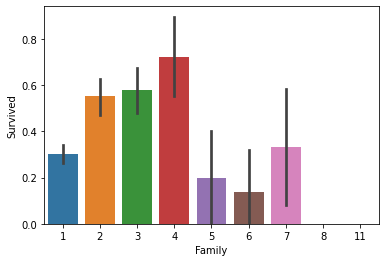

In [14]:
sns.barplot(x='Family', y='Survived', data=df);

Some passengers that appear to be traveling alone by account of their family size were part of a group traveling on the same ticket. To see this, get all the passengers traveling on the ticket "1601" (there are 7 of them).

In [15]:
df[df["Ticket"]=="1601"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,1
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,1
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,1
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,1
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,1


One can check that there are many tickets shared among passengers that may or may not be family members.

In [16]:
df['Ticket'].value_counts()[:15]

347082          7
1601            7
CA. 2343        7
3101295         6
347088          6
CA 2144         6
382652          5
S.O.C. 14879    5
4133            4
W./C. 6608      4
17421           4
2666            4
349909          4
LINE            4
19950           4
Name: Ticket, dtype: int64

Create a new column named *TicketCount* that counts the total number of passengers traveling in each passengers' ticket.

Hint: 
- First group passengers based on their tickets using `groupby()` on the *Ticket* column.
- For the grouped object, pick any column that has no missing values.
- Use `transform()` for this unique identifier column with the function `"count"` to create a new column *TicketCount*.

For example, we created *MedianAge* using the following code:   
```df['MedianAge'] = df.groupby('Title')['Age'].transform("median")```

In [17]:
df['TicketCount'] = df.groupby('Ticket')['Name'].transform("count")

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,TicketCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


Plot the survival rates based on the *TicketCount* using `sns.barplot()` (see above).

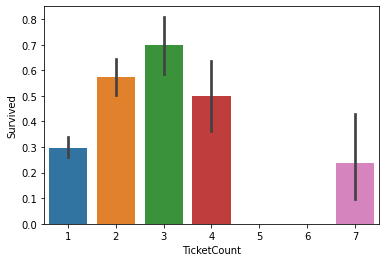

In [19]:
sns.barplot(x='TicketCount', y='Survived', data=df);

It does seem that the number of co-travelers have an impact on the survival rates.

We create a new column named *GroupSize* by picking the maximum value among the columns *Family* and *TicketCount*.   
We use the `max()` function for pandas on the two relevant columns with the appropriate value for the `axis` parameter. Max, a dataframe method, returns the max of each column or row, so here we want to use it on each row of a dataframe with two columns: Family and TicketCount.

In [20]:
df["GroupSize"] = df[['Family', 'TicketCount']].max(axis=1)

Plot the survival rates based on the *GroupSize* using `sns.barplot()`.

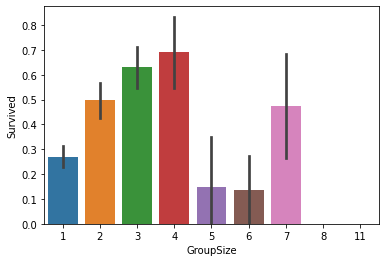

In [21]:
sns.barplot(y='Survived', x='GroupSize', data=df)

### **Part 2b key points**
In summary:
* `.describe()`, `.describe(include='O')`, `.isnull().sum()`, and `.value_counts()` are helpful methods for getting a sense of your data at a glance
* **Key point:** you can create new features from existing ones that you think may be more predictive than the features alone
* Use `.corr()` to get a table of linear correlations between features
* Use `.groupby()` to group data points by some column, and then you can use `transform()` to perform a simple calculation like finding the mean, or just counting how many there are
* Use `.get_dummies()` with `prefix=` to create one-hot features from a categorical variable

### 2. Creating a new column using grouping on two columns of [Predict Future Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales):

In [ ]:
path = 'competitive-data-science-predict-future-sales/'
df = pd.read_csv(path + 'sales_train.csv')
df.head()

[The description](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data) for each of the following columns is as follows. 
- date: date in format dd/mm/yyyy
- date_block_num: a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- shop_id: unique identifier of a shop
- item_id: unique identifier of a product
- item_price: current price of an item
- item_cnt_day: number of products sold
       
The aim of the competition is to predict the monthly sales. We are given the daily sales of items in each shop in the column *item_cnt_day*. We want to create a new column named *item_cnt_monthly* that gives the monthly sales of the items using the columns *item_cnt_day* and *date_block_num*. 

Currently, the rows are sorted based on the *date* column. We want them sorted first by *date_block_num* and then by *item_id* within each *date_block_num*. Hint: Use `sort_values()` on the two columns: `'date_block_num','item_id'`

We sorted the rows so that it will make it easier to check whether our code below is working correctly. For the *date_block_num* equal to 0, we can see that the item with *item_id* 19 is sold once, one with *item_id* 27 is sold 7 times and so on.

In [ ]:
df.head(20)

We can use `groupby()` on the two columns - *date_block_num* and *item_id* and sum the values in the *item_cnt_day* column in each grouping as follows.

In [ ]:
# df.groupby(['date_block_num', 'item_id'])['item_cnt_day'].sum()

Create a new column named *item_cnt_monthly* that gives the monthly sales of the items

Hint: Use `transform()` with the function `"sum"` along with `groupby()`.

Check that the code indeed worked as expected.

In [ ]:
df.head(25)

### 3. Merging columns from different datasets

A simple illustration to merge two datasets using `merge()`

In [ ]:
df1 = pd.DataFrame({'CourseCode': ['PHYS024', 'CSCI35', 'ENGR156'], 
                   'CourseName': ['Mechanics and Wave Motion', 
                                  'Computer Science for Insight',
                                 'Intro to Comm & Info Theory']})

df2 = pd.DataFrame({'Professor': ['Zachary Dodds', 'Vatche Sahakian', 
                                  'Timothy Tsai', 'Brian Shuve'],
                    'CourseCode': ['CSCI35', 'PHYS024',  'ENGR156', 'PHYS024']})

df1.head()

In [ ]:
df2.head()

In [ ]:
pd.merge(df2, df1)

Please refer to the documents [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) and [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) to better grasp how and when to use `merge()` function. 

#### Merging dataframes from [Instacart Market Basket Analysis](https://www.kaggle.com/c/instacart-market-basket-analysis/data) dataset:
Load the four files into separate dataframes:   
`aisles.csv`   
`departments.csv`  
`products.csv`  
`order_products__train.csv`

In [ ]:
path = 'instacart-market-basket-analysis/'
dfa = pd.read_csv(path + 'aisles.csv')
dfd = pd.read_csv(path + 'departments.csv')
dfp = pd.read_csv(path + 'products.csv')
dfo = pd.read_csv(path + 'order_products__train.csv')

Familiarize yourself with the dataframes. Hint: Use `head()`.  

In [ ]:
dfa.head()

In [ ]:
dfd.head()

In [ ]:
dfp.head()

In [ ]:
dfo.tail()

Get a dataframe consisting of the name of the products along with their aisle names and department names for the order with `order_id` equal to 1.   
Note: dataframe must have ***8 rows and only three columns:
```'product_name', 'aisle', 'department'```***

Hint: 
- First slice out 8 rows from the order_products dataframe that corresponds with `order_id` equal to 1 and save it in a dataframe.
- Use `merge()` multiple times to merge two dataframes at a time starting with the dataset that have a column in common with the dataframe corresponding to 'order_products__train.csv'.
- Finally slice out the 3 selective columns: `'product_name', 'aisle', 'department'`

In [ ]:
df.shape

The output should be (8, 3). Please check your code above if you get something else.

### 4: Exploring csv files

Dataframes are easily convertible to and from csv (comma seperated text) files. Convert the last dataframe to a csv file using `to_csv()`.

In [ ]:
df.to_csv('out.csv')

Instructions for the next steps if using Jupyter Notebook in your laptop:
* Go to the folder where Notebook is saved and locate the output file.
* Open the csv file using MS-Excel, any text editor or other application of your choice that supports csv files. 
* Edit the file and save it.

Now, read the csv file and check whether the changes are reflected.

# Conclusion
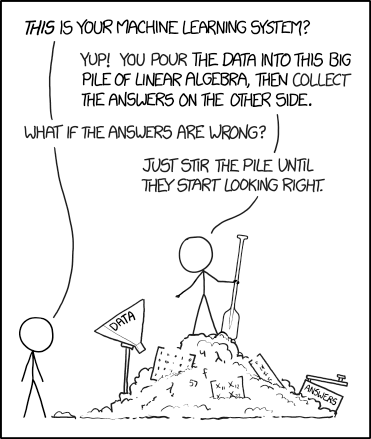

**Don't be like this guy!**

When confronted with a machine learning task, there are a couple very important steps to get out of the way before doing the "actual" ML. When dealing with tasks that involve making predictions, these steps usually look like this:

```
* Gather data
* Explore your data
  * Fill in missing data or discard unhelpful data
  * Visualize data
  * Look for patterns / relationships
* Feature engineering
```

After completing these steps, your final features will be your inputs to your machine learning model.

Next week we'll return to our Titanic dataset and build a machine learning model to predict whether passengers survived based on our features!